<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [2]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.5 MB/s eta 0:00:00


In [3]:
!pip install --upgrade yfinance

In [4]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [5]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-11-29'

In [6]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

/tmp/ipython-input-847437481.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [7]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-11-24,3846.060059,3917.159912,3838.199951,3915.159912,373100
2025-11-25,3857.780029,3946.610107,3833.350098,3942.360107,279300
2025-11-26,3960.870117,3960.870117,3866.659912,3891.879883,295300
2025-11-27,3986.909912,4023.419922,3968.429932,3989.449951,257900
2025-11-28,3926.590088,3995.300049,3921.889893,3995.300049,241923


In [8]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-11-24,3915.16,3917.16,3838.20,3846.06,373120108,-0.0019,2,-7.20,21411253137675,3.169272e+15
2025-11-25,3942.36,3946.61,3833.35,3857.78,279293988,0.0030,1,11.72,13275808347538,3.180590e+15
2025-11-26,3891.88,3960.87,3866.66,3960.87,295326951,0.0267,1,103.09,15777742925834,3.265922e+15
2025-11-27,3989.45,4023.42,3968.43,3986.91,257854943,0.0066,1,26.04,13008961064052,3.286295e+15
2025-11-28,3995.30,3995.30,3921.89,3926.59,241922807,-0.0151,2,-60.32,11927326021478,3.235761e+15


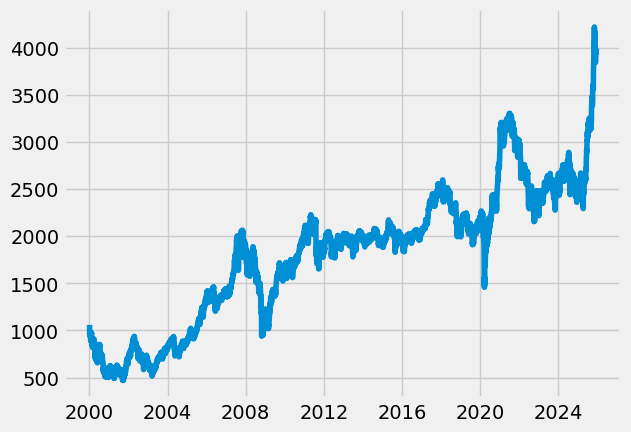

In [9]:
datag1=data1[['Close']]
plt.plot(datag1)

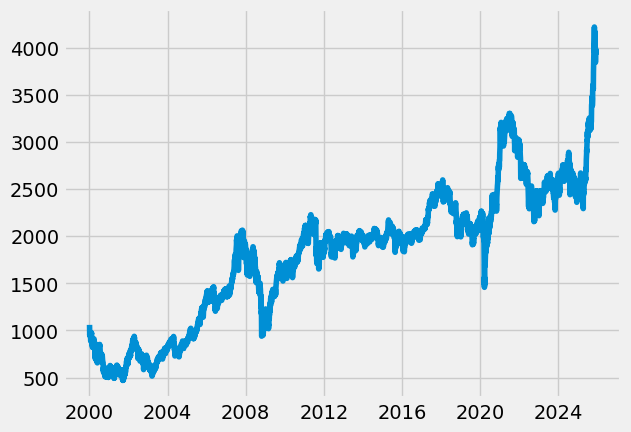

In [10]:
datag2=data2[['Close']]
plt.plot(datag2)

In [11]:
Kospi=data1

In [12]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [13]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-11-24,3846.060059,3917.159912,3838.199951,3915.159912,373100,-0.001870
2025-11-25,3857.780029,3946.610107,3833.350098,3942.360107,279300,0.003043
2025-11-26,3960.870117,3960.870117,3866.659912,3891.879883,295300,0.026372
2025-11-27,3986.909912,4023.419922,3968.429932,3989.449951,257900,0.006553
2025-11-28,3926.590088,3995.300049,3921.889893,3995.300049,241923,-0.015245


In [14]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

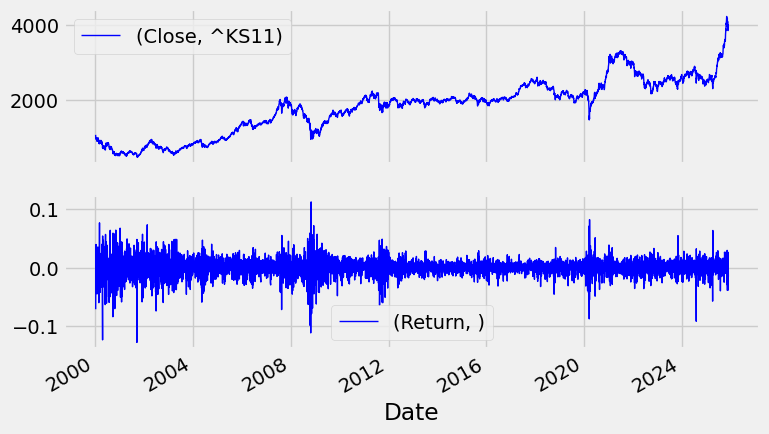

In [15]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [16]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [17]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-11-24,3846.060059,3843.574774,2951.188755
2025-11-25,3857.780029,3852.864526,2956.833422
2025-11-26,3960.870117,3865.082782,2962.900923
2025-11-27,3986.909912,3877.977777,2969.280089
2025-11-28,3926.590088,3891.491278,2975.413881


<Axes: xlabel='Date'>

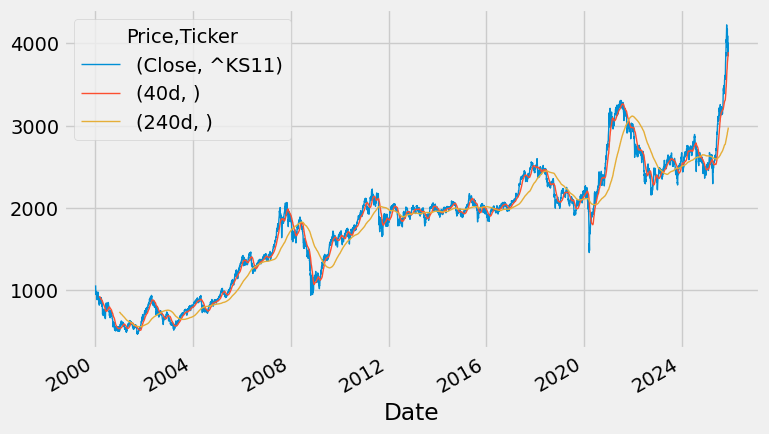

In [18]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [19]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

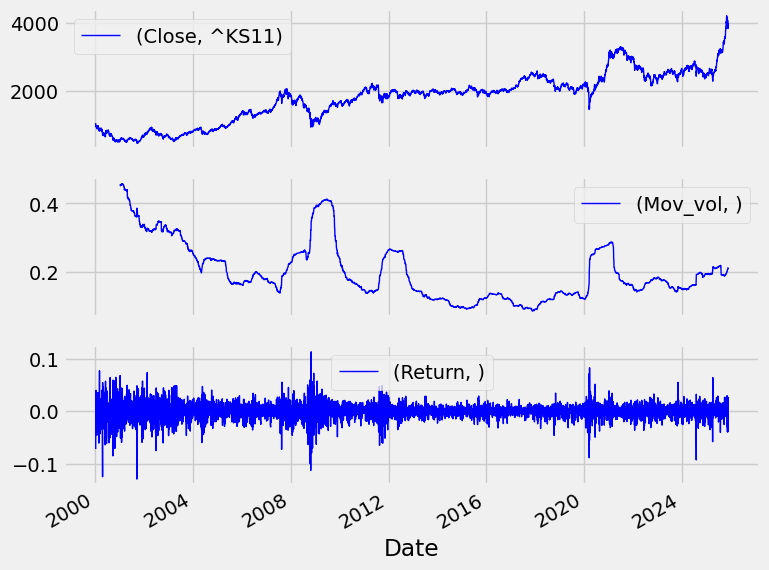

In [20]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

#### 주요 주가지수 분석

In [21]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

/tmp/ipython-input-3965347332.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  kospi = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100
[*********************100%***********************]  1 of 1 completed


In [22]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [23]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [24]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [25]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [26]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [27]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [28]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


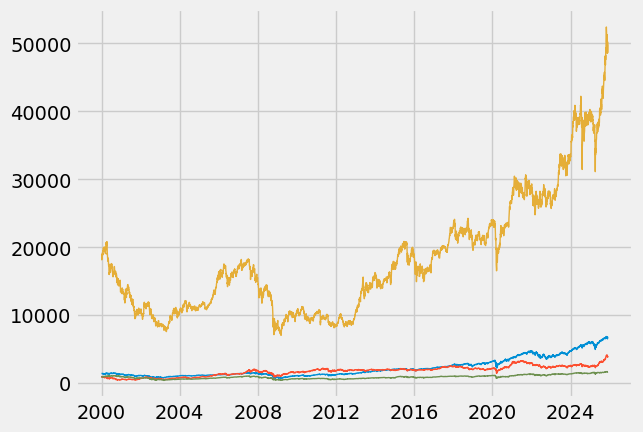

In [29]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [30]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

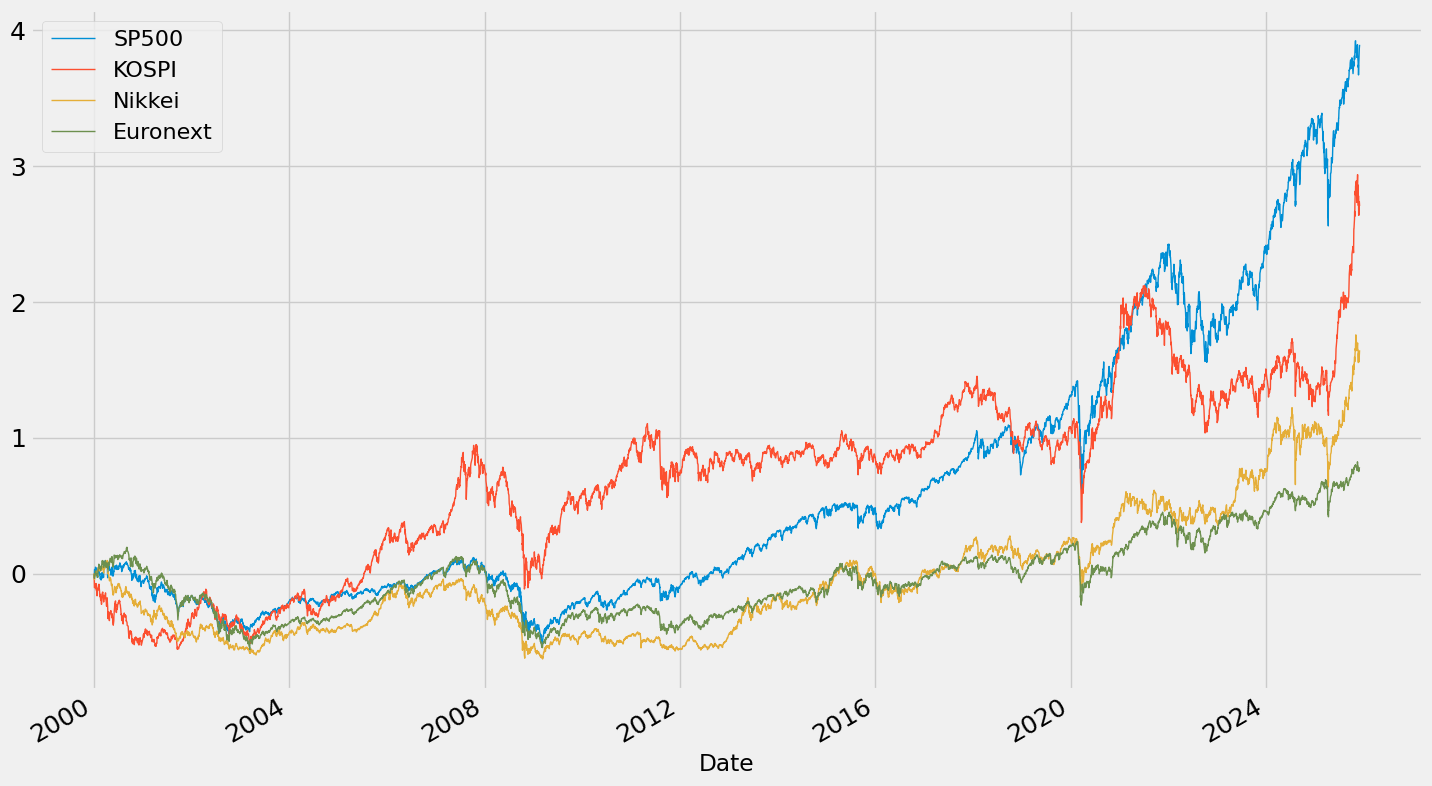

In [31]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

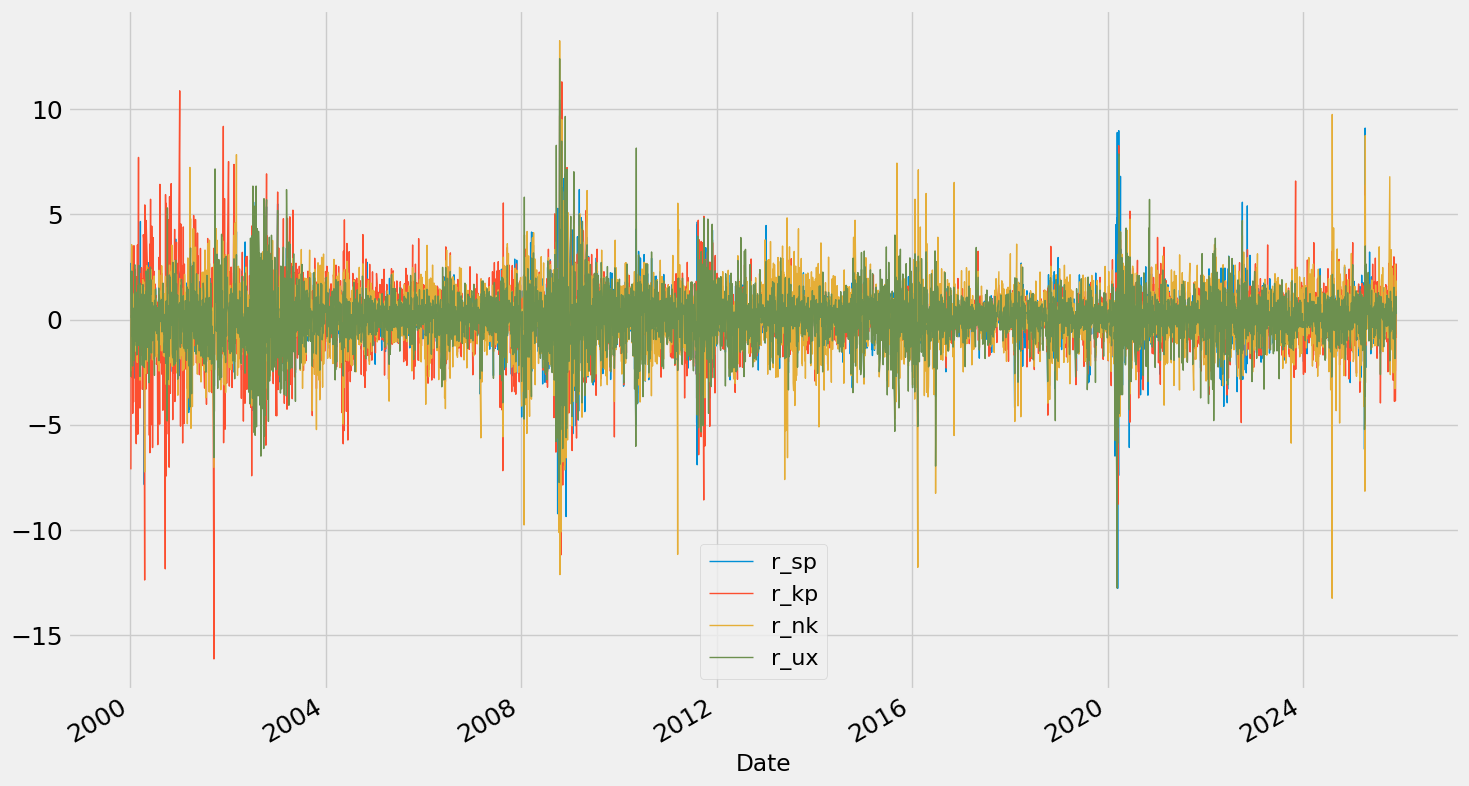

In [32]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [33]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5812.000000,5812.000000,5812.000000,5812.000000
mean,2245.202892,1803.265358,18084.851411,919.480239
std,1426.849869,716.279405,8728.638553,277.527810
min,676.530029,468.760010,7054.979980,419.950012
25%,1209.000000,1278.552460,10889.500000,692.894974
50%,1518.010010,1946.215027,16082.830078,881.329987
75%,2872.987610,2281.757568,22278.007812,1062.079956
max,6890.890137,4170.629883,52411.339844,1742.890015


In [34]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5811.000000,5811.000000,5811.000000,5811.000000
mean,0.027328,0.022550,0.016735,0.009952
std,1.281392,1.524475,1.540155,1.337885
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.488804,-0.629780,-0.731083,-0.591759
50%,0.073263,0.075761,0.055218,0.061991
75%,0.612309,0.764835,0.839320,0.657155
max,10.423562,11.284352,13.234592,12.378520


In [35]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5811.000000  5811.000000  5811.000000  5811.000000
mean      0.027328     0.022550     0.016735     0.009952
std       1.281392     1.524475     1.540155     1.337885
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.488804    -0.629780    -0.731083    -0.591759
50%       0.073263     0.075761     0.055218     0.061991
75%       0.612309     0.764835     0.839320     0.657155
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.405362
r_kp   -0.600620
r_nk   -0.457046
r_ux   -0.155473
dtype: float64
kurtosis:  r_sp    10.068786
r_kp     8.942327
r_nk     7.327282
r_ux     7.466332
dtype: float64


In [36]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.812000e+03    5812.000000  5.812000e+03   5812.000000
mean   2.245203e+03    1803.265358  1.808485e+04    919.480239
std    1.426850e+03     716.279405  8.728639e+03    277.527810
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.209000e+03    1278.552460  1.088950e+04    692.894974
50%    1.518010e+03    1946.215027  1.608283e+04    881.329987
75%    2.872988e+03    2281.757568  2.227801e+04   1062.079956
max    6.890890e+03    4170.629883  5.241134e+04   1742.890015
var    2.035901e+06  513056.185424  7.618913e+07  77021.685537
skew   1.296848e+00      -0.059012  1.152445e+00      0.666299
kurt   7.498052e-01      -0.479119  8.695663e-01     -0.172053


In [37]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5811.000000  5811.000000  5811.000000  5811.000000
mean      0.027328     0.022550     0.016735     0.009952
std       1.281392     1.524475     1.540155     1.337885
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.488804    -0.629780    -0.731083    -0.591759
50%       0.073263     0.075761     0.055218     0.061991
75%       0.612309     0.764835     0.839320     0.657155
max      10.423562    11.284352    13.234592    12.378520
var       1.641965     2.324024     2.372078     1.789936
skew     -0.405362    -0.600620    -0.457046    -0.155473
kurt     10.068786     8.942327     7.327282     7.466332


In [38]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.801403,0.969254,0.918815
KOSPI,0.801403,1.000000,0.749002,0.697367
Nikkei,0.969254,0.749002,1.000000,0.960470
Euronext,0.918815,0.697367,0.960470,1.000000


In [39]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.226754,0.195885,0.593381
r_kp,0.226754,1.000000,0.610617,0.377366
r_nk,0.195885,0.610617,1.000000,0.398838
r_ux,0.593381,0.377366,0.398838,1.000000


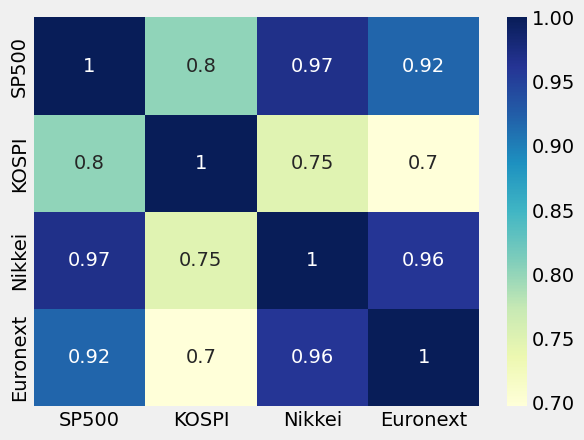

In [40]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

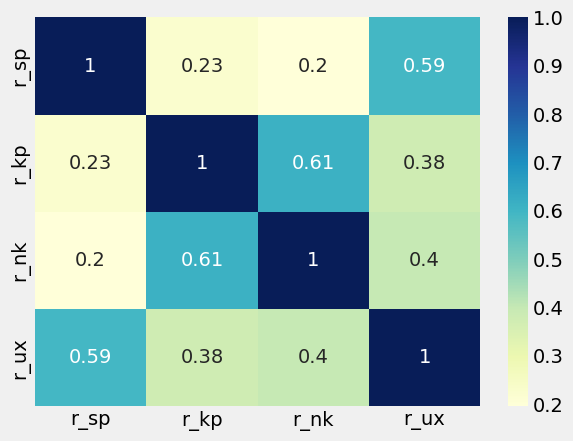

In [41]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### 회귀 분석

In [42]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

/tmp/ipython-input-3458128986.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3458128986.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^vix',start_date, end_date) #VIX 지수
[*********************100%***********************]  1 of 1 completed


In [43]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [44]:
data.tail()

,SP500,VIX
Date,,
2025-11-21,6602.990234,23.430000
2025-11-24,6705.120117,20.520000
2025-11-25,6765.879883,18.559999
2025-11-26,6812.609863,17.190001
2025-11-28,6849.089844,16.350000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

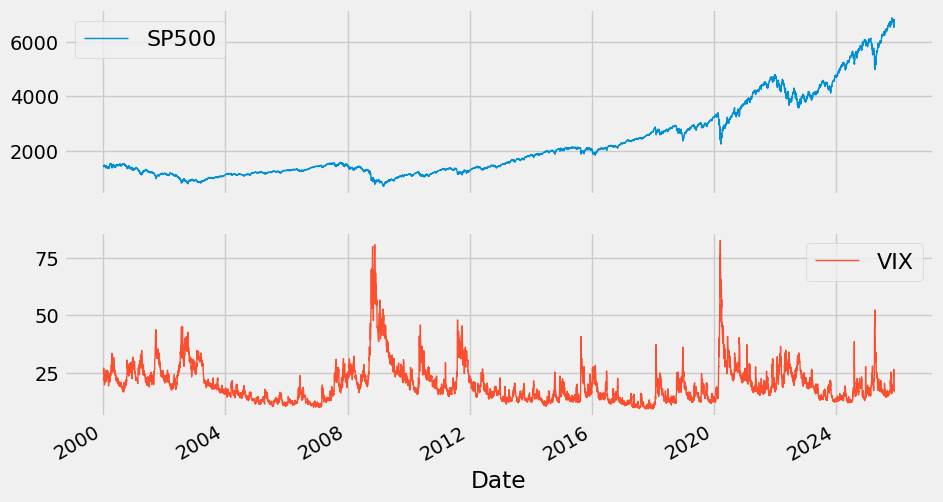

In [45]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

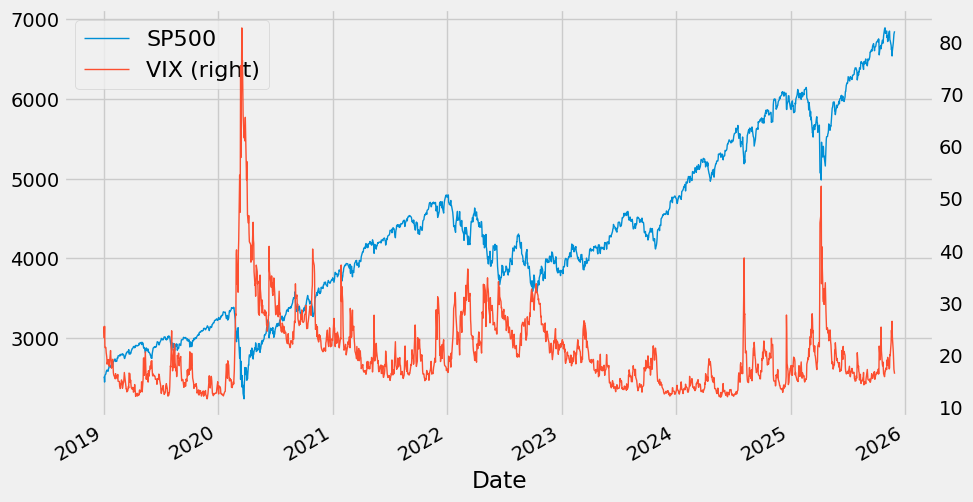

In [46]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [47]:
rets = np.log(data / data.shift(1))

In [48]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [49]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

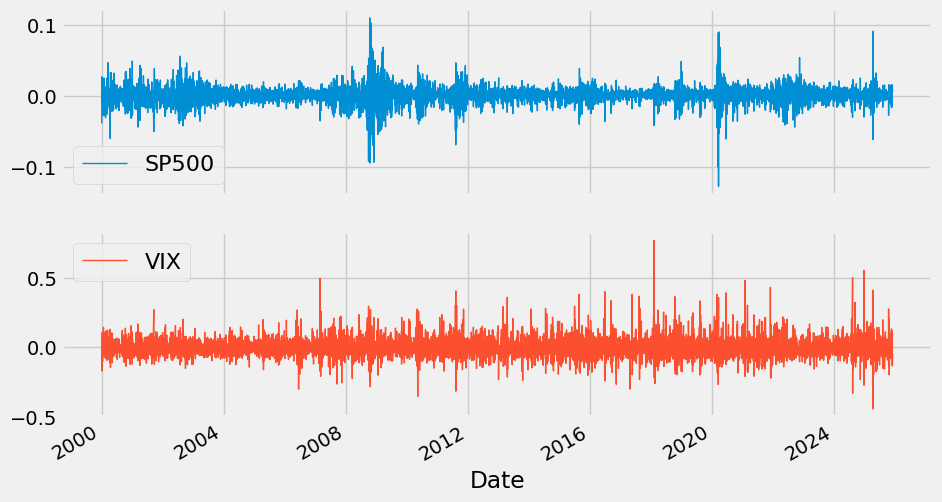

In [50]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

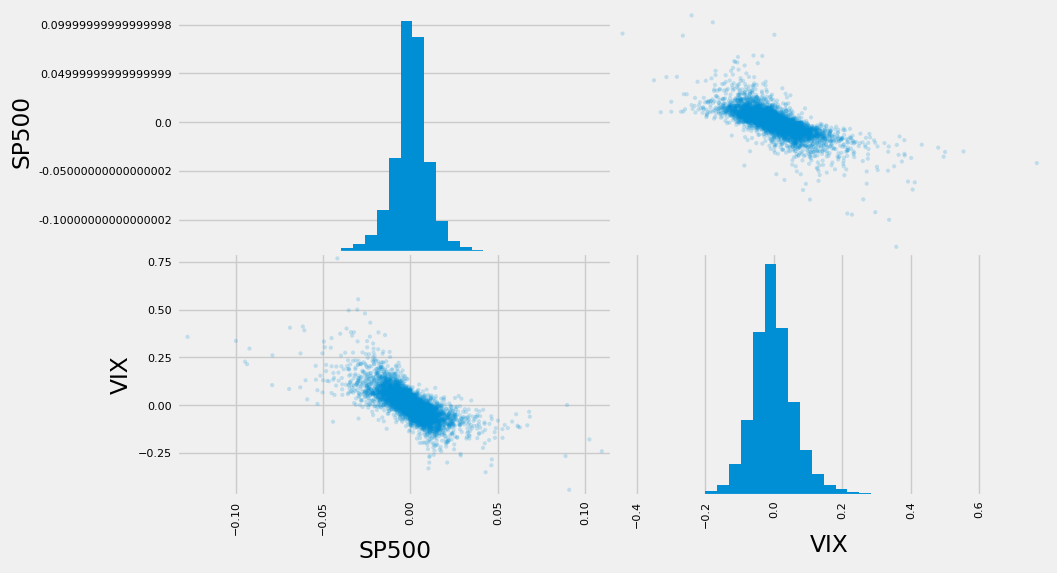

In [51]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [52]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

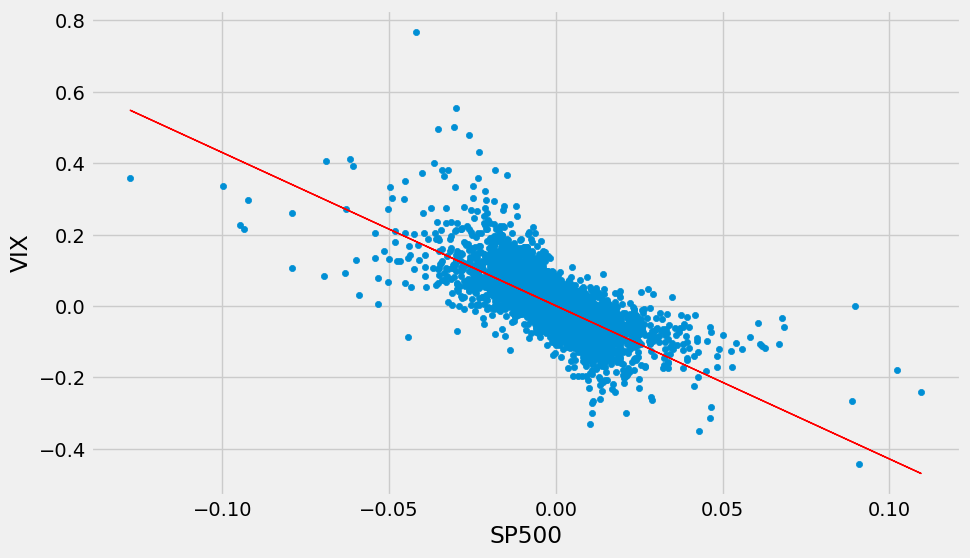

In [53]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [54]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.732032
VIX,-0.732032,1.000000


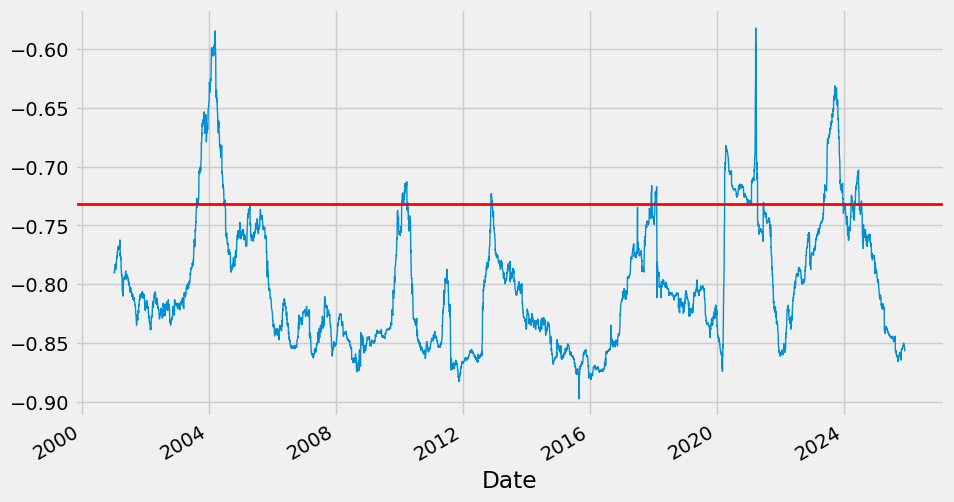

In [55]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')